# Weekly sales prediction for Wallmart using different models and comapring them

---------------------

## Problem Statement

- We have the sales data for 45 different wallmart stores and we are trying to predict the weekly sales of different stores based on variables such as store number, date, temperature, fuel price, unemployment rate etc.
- We have used all the different regression machine learning techniques and used the best model along with its hyperparameter tuning for the prediction.
- A demo for deployment by taking user-input is also shown in the end of the project for future prediction using the model

--------------------

# Objective
 - Understand the dataset and features
 - Use suitable Data Preprocessing and Feature Selection/Engineering Methods
 - Fine tune the model and hyper parameters and Finalise the Model
 - Make the model deployment-ready by giving User-Input provision

# Approach
 - Importing all libraries which we needed.
 - Perform data preprocessing technique to get balanced structured data.
 - Perform statistical data analysis and derive valuable inference.
 - Perform exploratory data analysis and derive valuable inference.
 - Visualizing things with some plot and derive valuable inference.
 - Train and test through Various different models.
 - Choose the best model
 - Perform hyperparameter tuining
 - Make predictions based on the best model

## Sections

1. Importing libraries
2. Loading the dataset
3. Data exploration
4. Data Visualization
5. Feature Engineering
6. Modelling
7. Hyperparameter Tuining
8. Deployment

----------------

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from termcolor import cprint

## Importing the dataset

In [2]:
data = pd.read_csv("C:/Somya/Datasets/Walmart.csv")

## About the dataset

This datset contains data for the weekly sales prediction for one of the leading retail store, Walmart. There are sales data available for 45 stores of Walmart. 

- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate

Here our dependent variable or the column which we are trying to  predict is *Weekly sales* and rest are independent variables.

## Data Exploration

In [3]:
data.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,1,2010-02-05,0,42.31,2.572,211.096358,8.106,1643690.90
1,1,2010-02-12,1,38.51,2.548,211.242170,8.106,1641957.44
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,1611968.17
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,1409727.59
4,1,2010-03-05,0,46.50,2.625,211.350143,8.106,1554806.68


In [4]:
data.shape

(6435, 8)

In [5]:
data.dtypes

Store             int64
Date             object
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Weekly_Sales    float64
dtype: object

In [6]:
data.count()

Store           6435
Date            6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
Weekly_Sales    6435
dtype: int64

In [7]:
data.describe(include = 'all')

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
count,6435.000000,6435,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6.435000e+03
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-09-02,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,0.069930,60.663782,3.358607,171.578394,7.999151,1.046965e+06
std,12.988182,NaN,0.255049,18.444933,0.459020,39.356712,1.875885,5.643666e+05
min,1.000000,NaN,0.000000,-2.060000,2.472000,126.064000,3.879000,2.099862e+05
25%,12.000000,NaN,0.000000,47.460000,2.933000,131.735000,6.891000,5.533501e+05
50%,23.000000,NaN,0.000000,62.670000,3.445000,182.616521,7.874000,9.607460e+05
75%,34.000000,NaN,0.000000,74.940000,3.735000,212.743293,8.622000,1.420159e+06


In [8]:
data.isnull().sum()

Store           0
Date            0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Weekly_Sales    0
dtype: int64

In [9]:
data.nunique()

Store             45
Date             143
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Weekly_Sales    6435
dtype: int64

In [12]:
Store = data.groupby(['Store']).agg({'Weekly_Sales':['mean','max','sum']})
Store[:5]

Weekly_Sales                          
               mean         max           sum
Store                                        
1      1.555264e+06  2387950.20  2.224028e+08
2      1.925751e+06  3436007.68  2.753824e+08
3      4.027044e+05   605990.41  5.758674e+07
4      2.094713e+06  3676388.98  2.995440e+08
5      3.180118e+05   507900.07  4.547569e+07

In [13]:
df = data.drop(['Date'], axis=1)

In [14]:
print(df)

      Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0         1             0        42.31       2.572  211.096358         8.106   
1         1             1        38.51       2.548  211.242170         8.106   
2         1             0        39.93       2.514  211.289143         8.106   
3         1             0        46.63       2.561  211.319643         8.106   
4         1             0        46.50       2.625  211.350143         8.106   
...     ...           ...          ...         ...         ...           ...   
6430     45             0        64.88       3.997  192.013558         8.684   
6431     45             0        64.89       3.985  192.170412         8.667   
6432     45             0        54.47       4.000  192.327265         8.667   
6433     45             0        56.47       3.969  192.330854         8.667   
6434     45             0        58.85       3.882  192.308899         8.667   

      Weekly_Sales  
0       1643690.90

## Data Visualizations

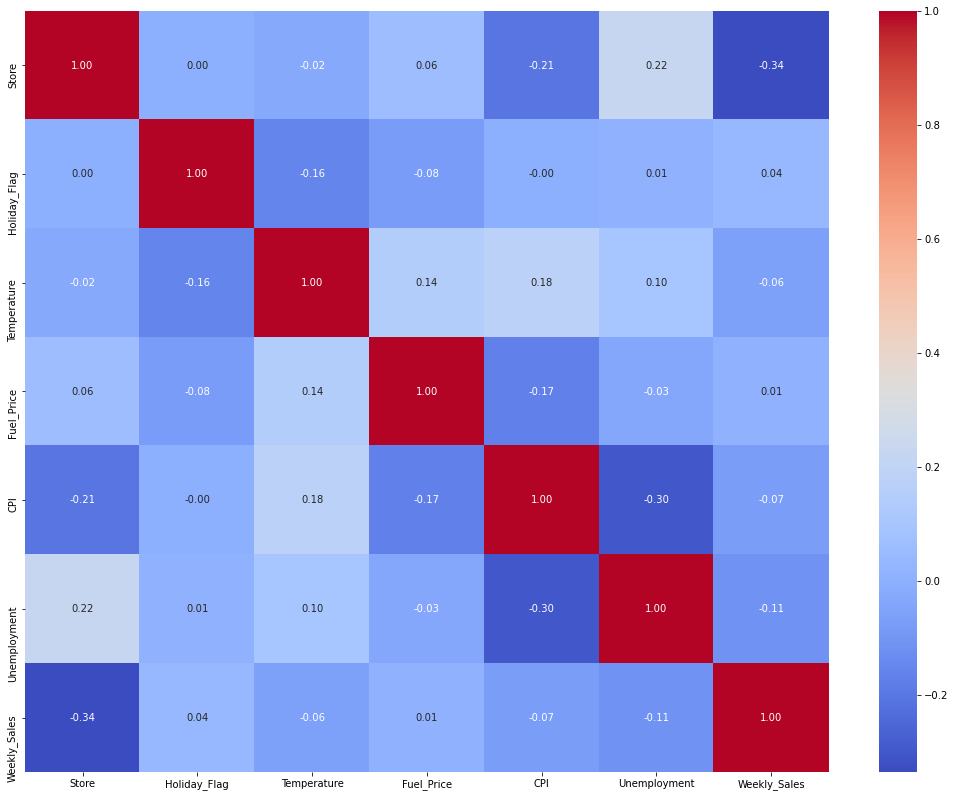

In [15]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

C:\Users\91995\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holiday_Flag', ylabel='count'>

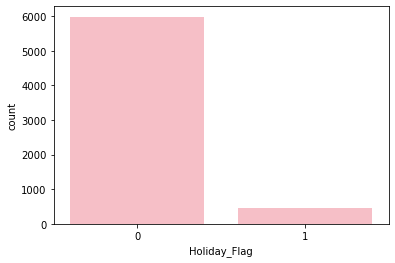

In [16]:
sns.countplot(df.Holiday_Flag,color='lightpink')

Text(0, 0.5, 'Weekly_Sales')

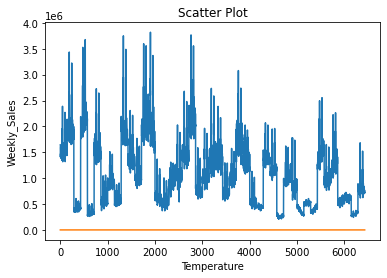

In [17]:
plt.plot(df['Weekly_Sales'])
plt.plot(df['Temperature'])
plt.title("Scatter Plot")
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')

<BarContainer object of 6435 artists>

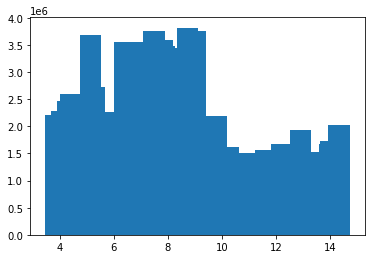

In [18]:
plt.bar(df['Unemployment'], df['Weekly_Sales'])

(array([1697., 1367., 1270., 1049.,  668.,  314.,   38.,   20.,    3.,
           9.]),
 array([ 209986.25,  570856.27,  931726.29, 1292596.31, 1653466.33,
        2014336.35, 2375206.37, 2736076.39, 3096946.41, 3457816.43,
        3818686.45]),
 <BarContainer object of 10 artists>)

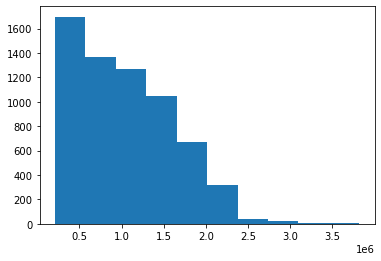

In [19]:
plt.hist(df['Weekly_Sales'])

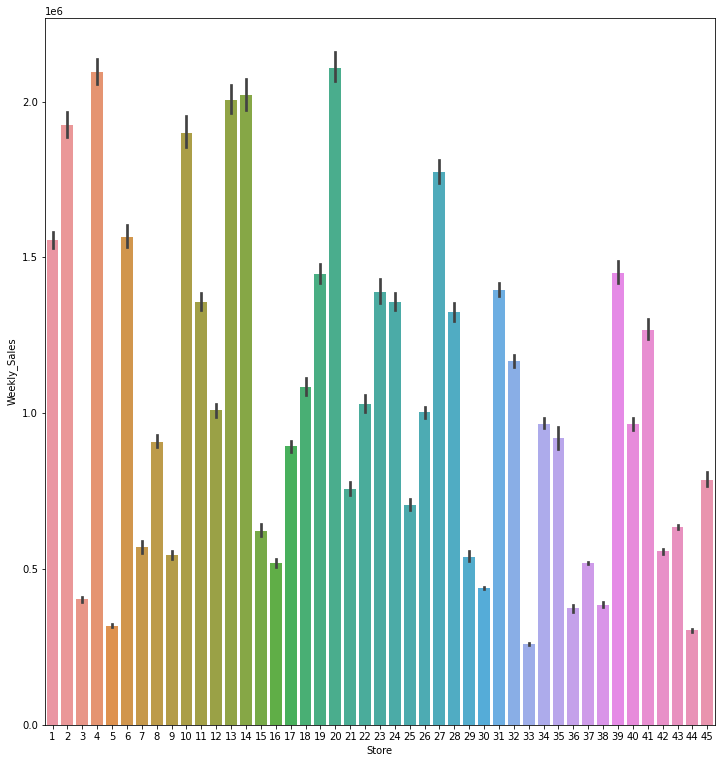

In [20]:
plt.figure(figsize=(12,13))
sns.barplot(x='Store', y='Weekly_Sales', data=df,)
plt.show()

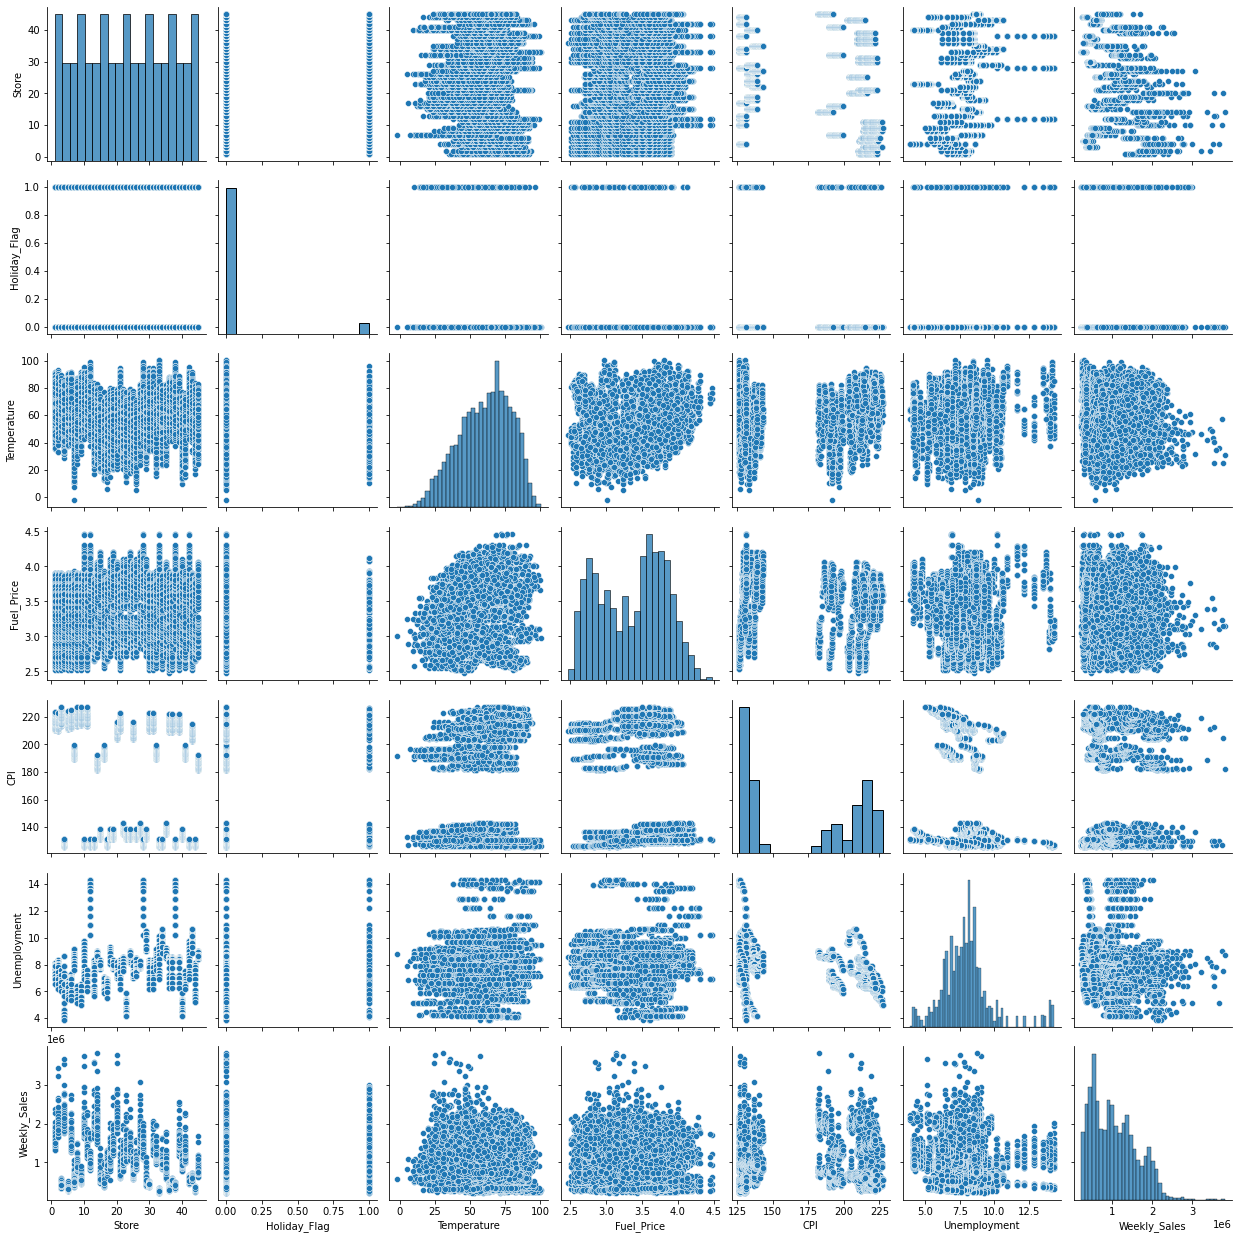

In [21]:
sns.pairplot(data = df,)
plt.show()

In [22]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

C:\Users\91995\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


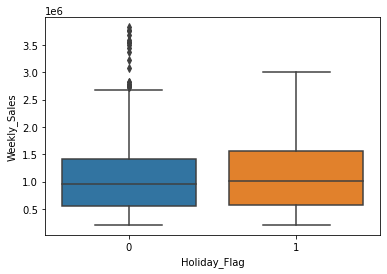

In [23]:
sns.boxplot(df.Holiday_Flag, df.Weekly_Sales)
plt.show()

([<matplotlib.patches.Wedge at 0x106f97a8>,
 [Text(-0.25679386593526243, -1.0696059603508306, 'Non Special Holiday Week'),
  Text(0.3268284610531304, 1.361316699760068, 'Special Holiday Week')],
 [Text(-0.14006938141923403, -0.5834214329186348, '92.50%'),
  Text(0.2101040106770124, 0.8751321641314721, '7.50%')])

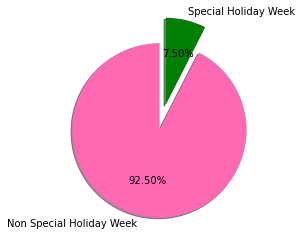

In [24]:
df4 = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df4['Weekly_Sales'],labels= ['Non Special Holiday Week','Special Holiday Week'],normalize=True,autopct='%1.2f%%',startangle=90,explode=[0,0.3],shadow=True,colors=['hotpink','green'])

<ipython-input-25-ba128f0b7fa9>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

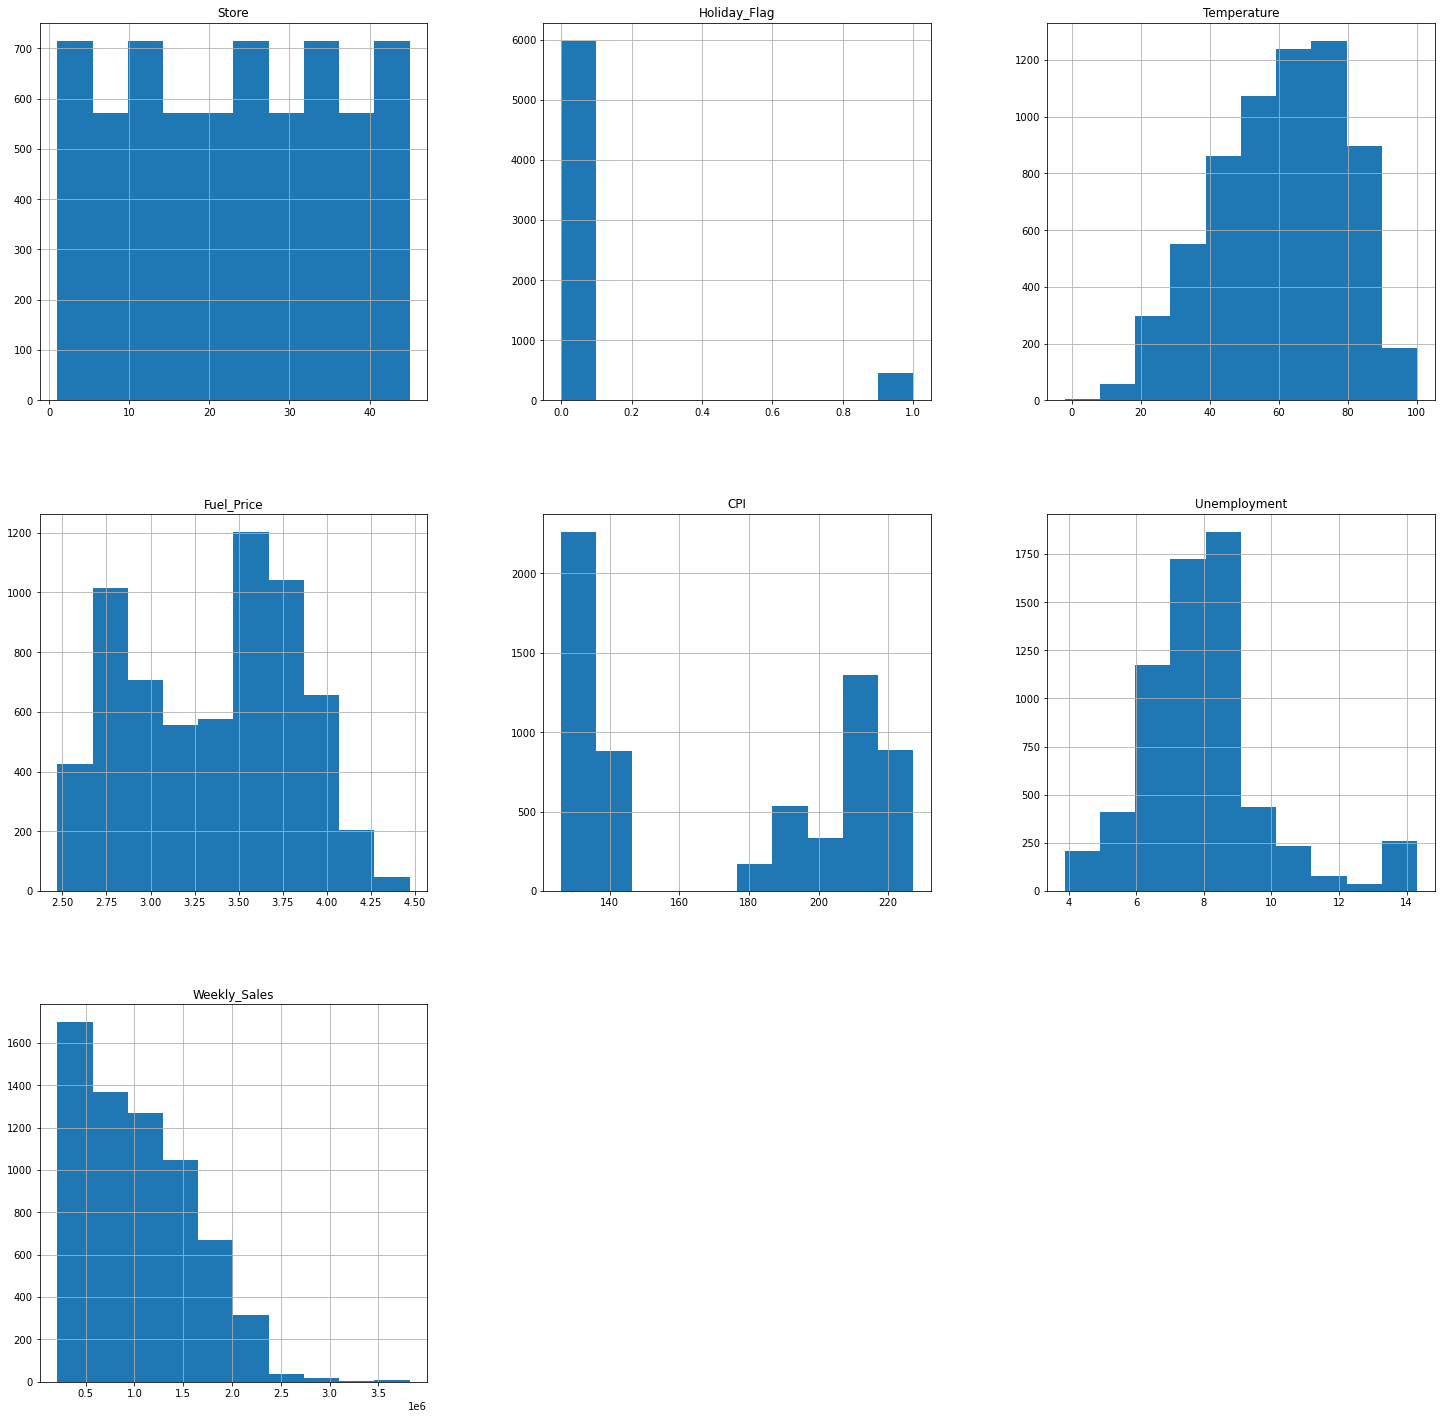

In [25]:
fig = plt.figure(figsize=(25,25))
ax = fig.gca()
df.hist(ax=ax)
plt.tight_layout

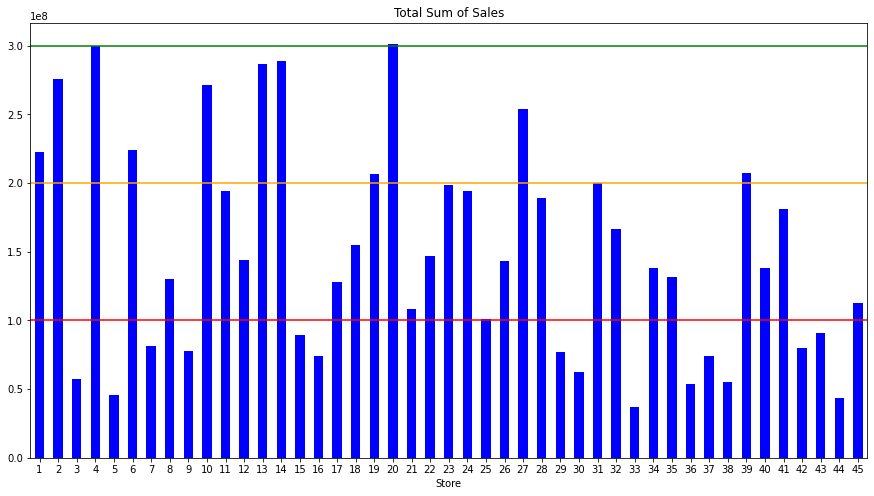

In [26]:
plt.figure(figsize = (15,8))
Store[('Weekly_Sales',  'sum')].plot(kind = 'bar',color = 'blue')
plt.xticks(rotation = 0)
plt.title('Total Sum of Sales')
plt.axhline(y=200000000,color = 'orange')
plt.axhline(y=100000000,color = 'red')
plt.axhline(y=300000000,color = 'green')
plt.show()

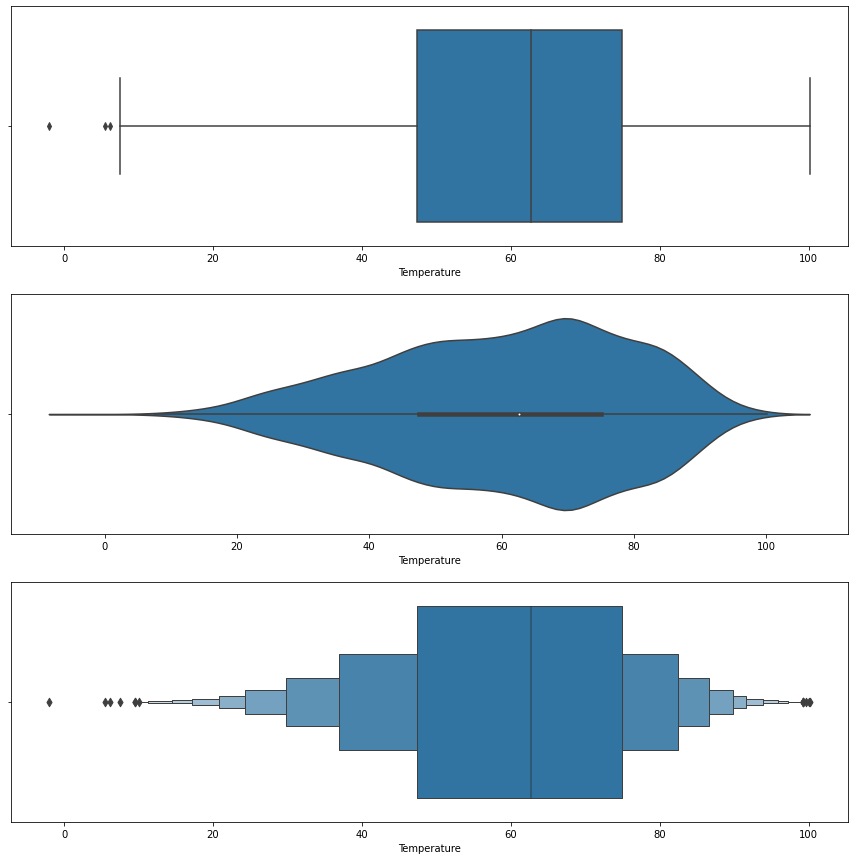

In [27]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 15))
sns.boxplot(x = df['Temperature'], ax=axs[0])
sns.violinplot(x = df['Temperature'], ax=axs[1])
sns.boxenplot(x = df['Temperature'], ax=axs[2])
plt.show()

## Feature Engineering

Creating dummy variables for categorical data

In [28]:
df_dummies = pd.get_dummies(df,columns=['Store','Holiday_Flag'])
print(df_dummies.columns.to_list())

['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0', 'Holiday_Flag_1']


In [29]:
x = df_dummies.drop(['Weekly_Sales'],axis=1)
y = df_dummies.Weekly_Sales

## MODELLING

## Linear Regression,Decision Tree, Random Forest, Lasso, Ridge and ElasticNet

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

## Training with 80:20 Ratio

In [31]:
df1 = pd.DataFrame(columns=["Model", "Accuracy for train","MSE for train","MAE for train","Accuracy for test","MSE for test","MAE for test"])

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 42)

In [33]:
def pred_model(model,x_train,y_train,x_test,y_test):
    c = model()
    c.fit(x_train,y_train)
    x_pred = c.predict(x_train)
    y_pred = c.predict(x_test)
    
    print(c)
    
    print("For Training Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_train, x_pred))
    print("MSE: ",mean_squared_error(y_train, x_pred))
    print("r2: ",r2_score(y_train, x_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_train, x_pred)))

    print("")
    print("For Test Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_test, y_pred))
    print("MSE: ",mean_squared_error(y_test, y_pred))
    print("r2: ",r2_score(y_test, y_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    
   # print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    #print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    #print(f'R2 : {r2_score(y_test,y_pred)}')
    
    
    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-x_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_pred),color = "green",label = 'Testing Predictions')
    plt.legend()
    plt.show()
    
    re = {}
    re["Model"] = c
    re["Accuracy for train"] = 100*(r2_score(y_train, x_pred))
    re["MSE for train"] = mean_squared_error(y_test, y_pred)
    re["MAE for train"] = mean_absolute_error(y_test, y_pred)
    re["Accuracy for test"] = 100*(r2_score(y_test, y_pred))
    re["MSE for test"] = mean_squared_error(y_test,y_pred)
    re["MAE for test"] = mean_absolute_error(y_test,y_pred)
    
    return re

LinearRegression()
For Training Data 
 --------------------------------
MAE:  91658.35902486402
MSE:  25483431780.22217
r2:  0.9197415754370657
RMSE:  159635.30868896822

For Test Data 
 --------------------------------
MAE:  91043.758997669
MSE:  25498972823.07913
r2:  0.9208486371997564
RMSE:  159683.97797862857
Residual Analysis:


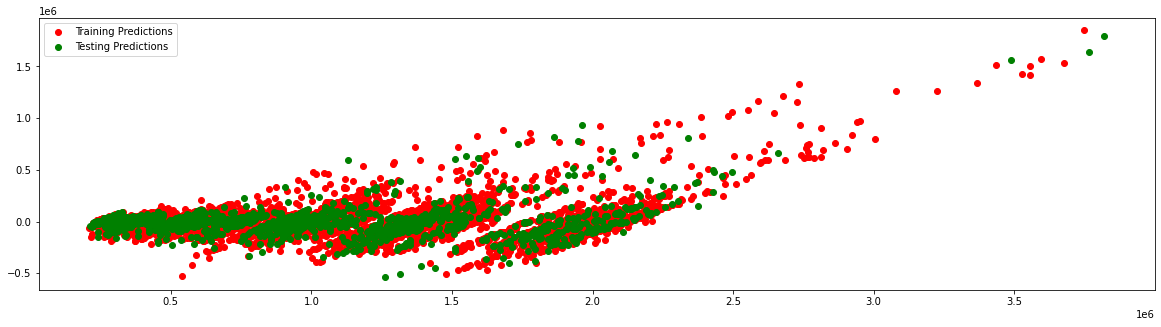

RandomForestRegressor()
For Training Data 
 --------------------------------
MAE:  28401.5222583139
MSE:  3096081930.211855
r2:  0.9902490896760058
RMSE:  55642.447198266316

For Test Data 
 --------------------------------
MAE:  78675.47176643358
MSE:  23706859218.141262
r2:  0.9264115371294078
RMSE:  153970.31927661013
Residual Analysis:


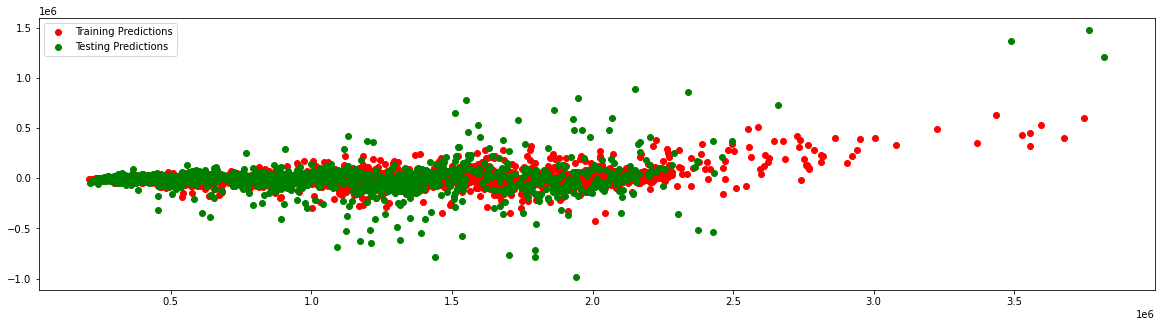

C:\Users\91995\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65597716547367.37, tolerance: 163457864416.1059
  model = cd_fast.enet_coordinate_descent(


Lasso()
For Training Data 
 --------------------------------
MAE:  91598.52938923726
MSE:  25484221653.017452
r2:  0.9197390877836483
RMSE:  159637.78266130312

For Test Data 
 --------------------------------
MAE:  90998.7017327428
MSE:  25494684053.82941
r2:  0.9208619499685965
RMSE:  159670.54848602923
Residual Analysis:


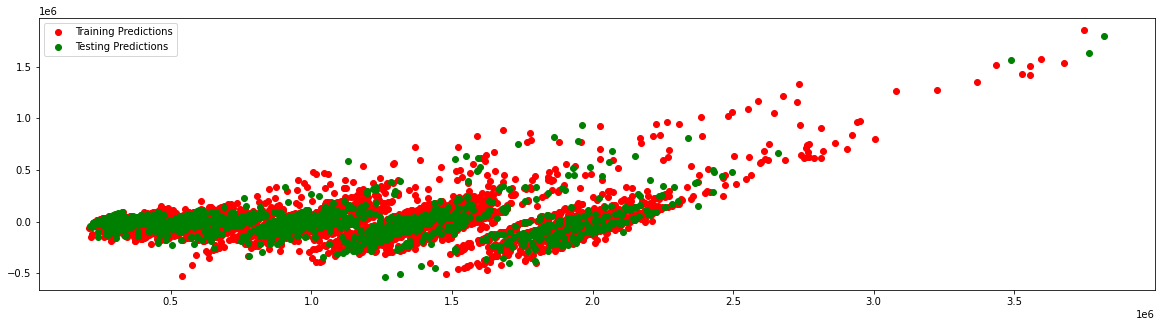

Ridge()
For Training Data 
 --------------------------------
MAE:  91259.13306522225
MSE:  25555855434.069084
r2:  0.9195134818110198
RMSE:  159861.9887092272

For Test Data 
 --------------------------------
MAE:  90637.27193754778
MSE:  25480789827.08348
r2:  0.9209050790385251
RMSE:  159627.0335096267
Residual Analysis:


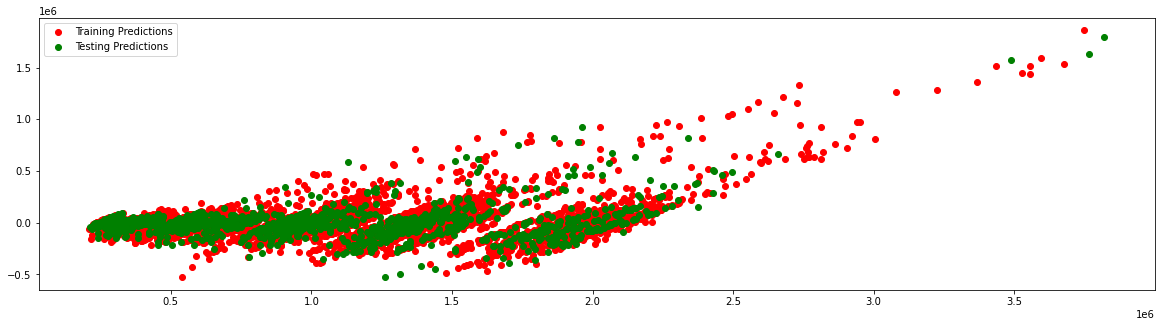

ElasticNet()
For Training Data 
 --------------------------------
MAE:  446462.93264128594
MSE:  285902294306.87006
r2:  0.09956916643360691
RMSE:  534698.3208379002

For Test Data 
 --------------------------------
MAE:  454902.5029152342
MSE:  291802023232.70123
r2:  0.09421732526292359
RMSE:  540187.0261610337
Residual Analysis:


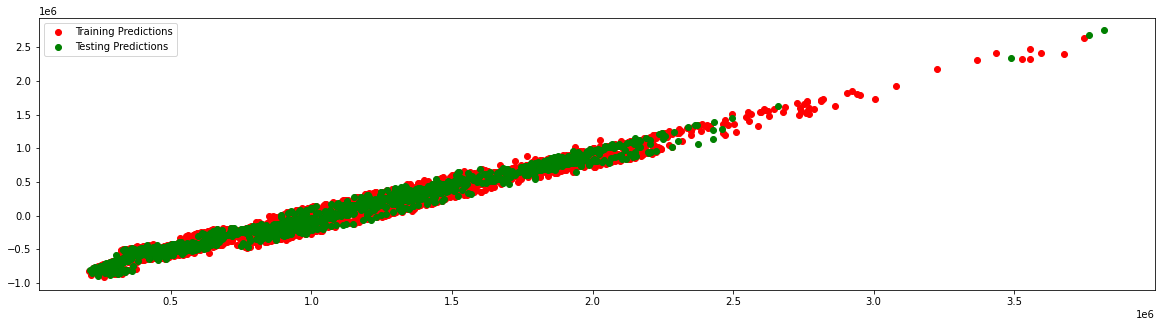

DecisionTreeRegressor()
For Training Data 
 --------------------------------
MAE:  0.0
MSE:  0.0
r2:  1.0
RMSE:  0.0

For Test Data 
 --------------------------------
MAE:  104119.46344211345
MSE:  45201180065.88648
r2:  0.8596910147237026
RMSE:  212605.6915180929
Residual Analysis:


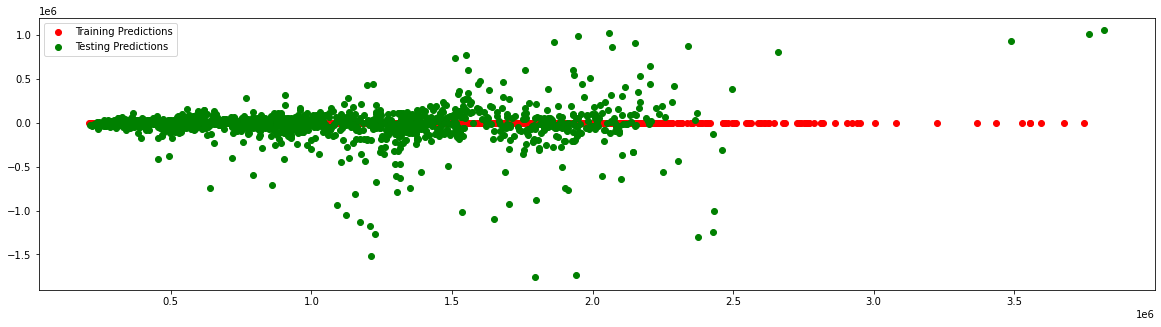

In [34]:
l = (LinearRegression,RandomForestRegressor,Lasso,Ridge,ElasticNet,DecisionTreeRegressor)

for i in l:
    re = pred_model(i, x_train,y_train,x_test,y_test)
    df1 = df1.append(re, ignore_index = True)

In [35]:
n1 = df1.Model.values
n1[1]='RandomForest()'

In [36]:
cprint('Results for 80:20 Ratio : ', 'green', attrs=['bold'])
df1

Results for 80:20 Ratio : 


,Model,Accuracy for train,MSE for train,MAE for train,Accuracy for test,MSE for test,MAE for test
0,LinearRegression(),91.974158,2.549897e+10,91043.758998,92.084864,2.549897e+10,91043.758998
1,RandomForest(),99.024909,2.370686e+10,78675.471766,92.641154,2.370686e+10,78675.471766
2,Lasso(),91.973909,2.549468e+10,90998.701733,92.086195,2.549468e+10,90998.701733
3,Ridge(),91.951348,2.548079e+10,90637.271938,92.090508,2.548079e+10,90637.271938
4,ElasticNet(),9.956917,2.918020e+11,454902.502915,9.421733,2.918020e+11,454902.502915
5,DecisionTreeRegressor(),100.000000,4.520118e+10,104119.463442,85.969101,4.520118e+10,104119.463442


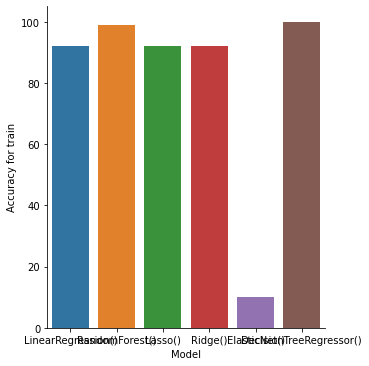

In [37]:
sns.catplot(x= 'Model',y='Accuracy for train',kind='bar',data=df1)

##  Training with 70:30 Ratio

In [38]:
df2 = pd.DataFrame(columns=["Model", "Accuracy for train","MSE for train","MAE for train","Accuracy for test","MSE for test","MAE for test"])

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state = 42)

In [40]:
def pred_model1(model,x_train,y_train,x_test,y_test):
    c = model()
    c.fit(x_train,y_train)
    x_pred = c.predict(x_train)
    y_pred = c.predict(x_test)
    
    print(c)
    
    print("For Training Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_train, x_pred))
    print("MSE: ",mean_squared_error(y_train, x_pred))
    print("r2: ",r2_score(y_train, x_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_train, x_pred)))

    print("")
    print("For Test Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_test, y_pred))
    print("MSE: ",mean_squared_error(y_test, y_pred))
    print("r2: ",r2_score(y_test, y_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    
    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-x_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_pred),color = "green",label = 'Testing Predictions')
    plt.legend()
    plt.show()
    
    re1 = {}
    re1["Model"] = c
    re1["Accuracy for train"] = 100*(r2_score(y_train, x_pred))
    re1["MSE for train"] = mean_squared_error(y_test, y_pred)
    re1["MAE for train"] = mean_absolute_error(y_test, y_pred)
    re1["Accuracy for test"] = 100*(r2_score(y_test, y_pred))
    re1["MSE for test"] = mean_squared_error(y_test,y_pred)
    re1["MAE for test"] = mean_absolute_error(y_test,y_pred)
    
    return re1

LinearRegression()
For Training Data 
 --------------------------------
MAE:  90743.4950688277
MSE:  25008667472.160522
r2:  0.9213101268943659
RMSE:  158141.28958675062

For Test Data 
 --------------------------------
MAE:  93555.73141377525
MSE:  26700116090.795395
r2:  0.9164892329004939
RMSE:  163401.70161536077
Residual Analysis:


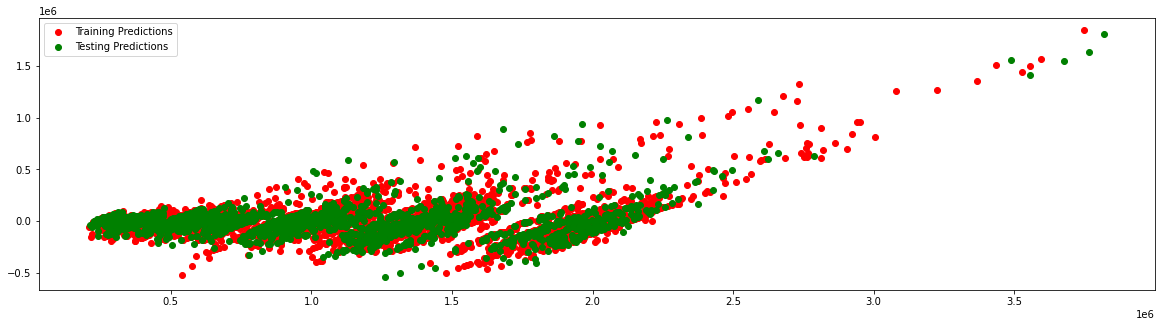

RandomForestRegressor()
For Training Data 
 --------------------------------
MAE:  28748.439919116336
MSE:  3227732996.698542
r2:  0.9898439251026943
RMSE:  56813.14105643643

For Test Data 
 --------------------------------
MAE:  78470.4861042983
MSE:  22233574618.332996
r2:  0.9304593708346762
RMSE:  149109.27073234916
Residual Analysis:


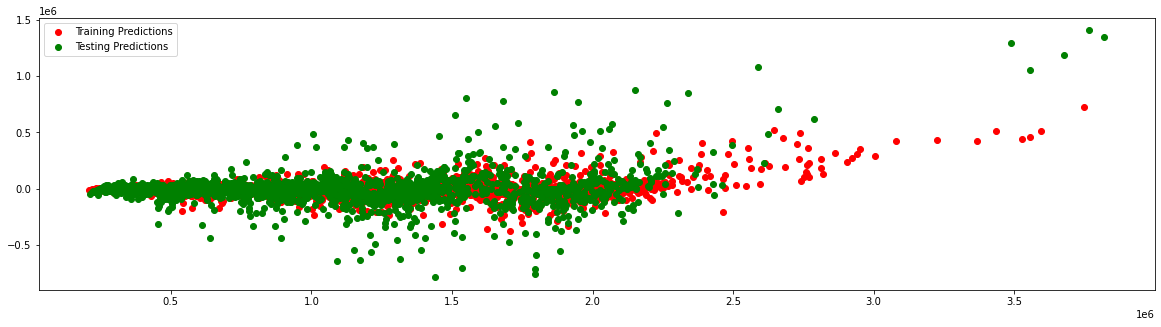

C:\Users\91995\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56310560117999.33, tolerance: 143142991402.9765
  model = cd_fast.enet_coordinate_descent(


Lasso()
For Training Data 
 --------------------------------
MAE:  90692.61590922697
MSE:  25009330410.97218
r2:  0.9213080409547202
RMSE:  158143.38560613967

For Test Data 
 --------------------------------
MAE:  93508.17526692004
MSE:  26701146966.805443
r2:  0.9164860085981691
RMSE:  163404.85600741932
Residual Analysis:


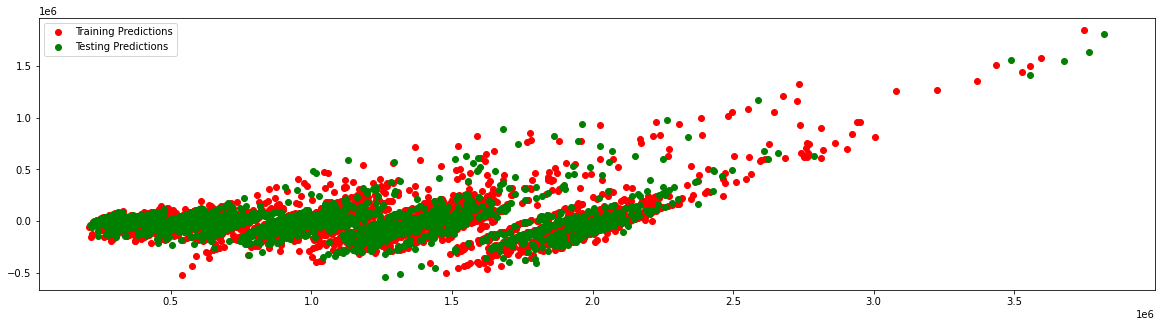

Ridge()
For Training Data 
 --------------------------------
MAE:  90395.53707184401
MSE:  25083064798.31056
r2:  0.9210760354074579
RMSE:  158376.33913659755

For Test Data 
 --------------------------------
MAE:  93085.19065616053
MSE:  26737664233.555767
r2:  0.9163717924296578
RMSE:  163516.55645088592
Residual Analysis:


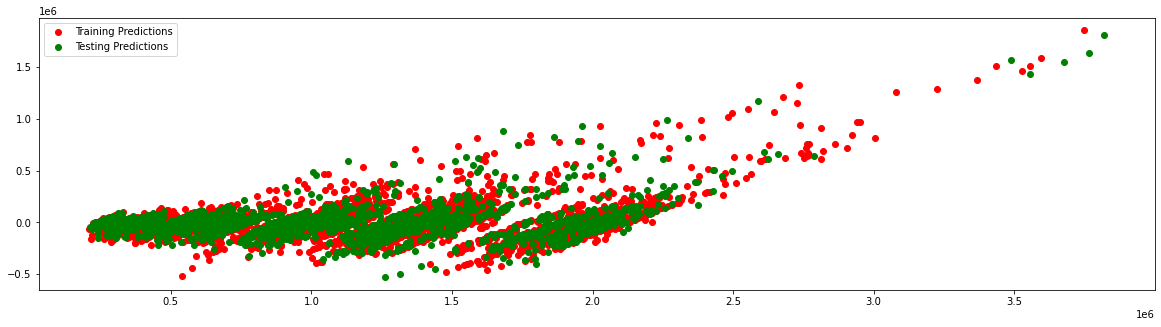

ElasticNet()
For Training Data 
 --------------------------------
MAE:  445973.7501760309
MSE:  285938634867.50665
r2:  0.10029293168979403
RMSE:  534732.3020610468

For Test Data 
 --------------------------------
MAE:  451691.05530624115
MSE:  289625955304.5144
r2:  0.09412806981219579
RMSE:  538169.076875023
Residual Analysis:


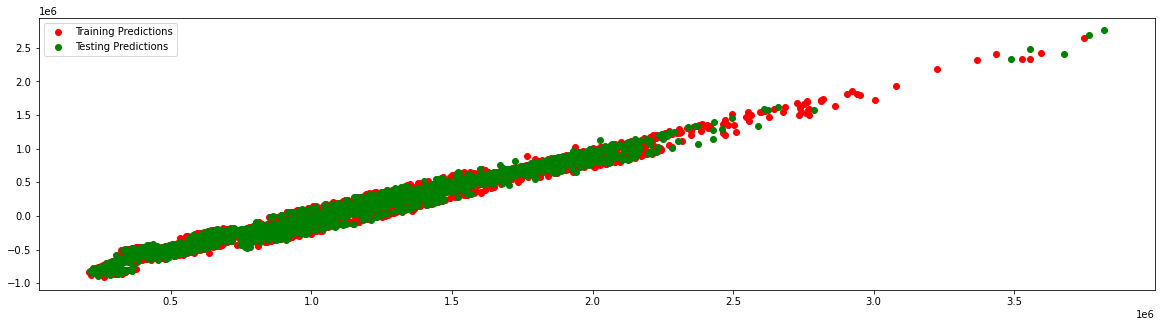

DecisionTreeRegressor()
For Training Data 
 --------------------------------
MAE:  0.0
MSE:  0.0
r2:  1.0
RMSE:  0.0

For Test Data 
 --------------------------------
MAE:  98271.01506473329
MSE:  36664926180.28164
r2:  0.885321992587978
RMSE:  191480.8768004827
Residual Analysis:


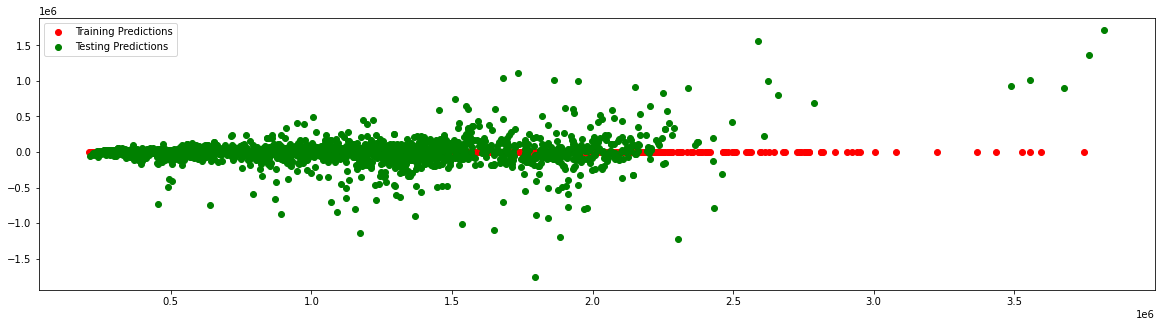

In [41]:
l = (LinearRegression,RandomForestRegressor,Lasso,Ridge,ElasticNet,DecisionTreeRegressor)

for i in l:
    re1 = pred_model1(i, x_train,y_train,x_test,y_test)
    df2 = df2.append(re1, ignore_index = True)    

In [42]:
n2 = df2.Model.values
n2[1]='RandomForest()'

In [43]:
cprint('Results for 70:30 Ratio : ', 'green', attrs=['bold'])
df2

Results for 70:30 Ratio : 


,Model,Accuracy for train,MSE for train,MAE for train,Accuracy for test,MSE for test,MAE for test
0,LinearRegression(),92.131013,2.670012e+10,93555.731414,91.648923,2.670012e+10,93555.731414
1,RandomForest(),98.984393,2.223357e+10,78470.486104,93.045937,2.223357e+10,78470.486104
2,Lasso(),92.130804,2.670115e+10,93508.175267,91.648601,2.670115e+10,93508.175267
3,Ridge(),92.107604,2.673766e+10,93085.190656,91.637179,2.673766e+10,93085.190656
4,ElasticNet(),10.029293,2.896260e+11,451691.055306,9.412807,2.896260e+11,451691.055306
5,DecisionTreeRegressor(),100.000000,3.666493e+10,98271.015065,88.532199,3.666493e+10,98271.015065


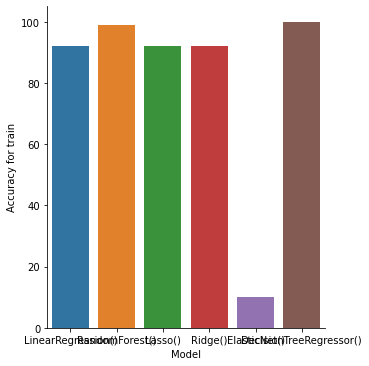

In [44]:
sns.catplot(x= 'Model',y='Accuracy for train',kind='bar',data=df2)

##  Training with 60:40 Ratio

In [45]:
df3 = pd.DataFrame(columns=["Model", "Accuracy for train","MSE for train","MAE for train","Accuracy for test","MSE for test","MAE for test"])

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.4, random_state = 42)

In [47]:
def pred_model2(model,x_train,y_train,x_test,y_test):
    c = model()
    c.fit(x_train,y_train)
    x_pred = c.predict(x_train)
    y_pred = c.predict(x_test)
    
    print(c)
    
    print("For Training Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_train, x_pred))
    print("MSE: ",mean_squared_error(y_train, x_pred))
    print("r2: ",r2_score(y_train, x_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_train, x_pred)))

    print("")
    print("For Test Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_test, y_pred))
    print("MSE: ",mean_squared_error(y_test, y_pred))
    print("r2: ",r2_score(y_test, y_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    
    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-x_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_pred),color = "green",label = 'Testing Predictions')
    plt.legend()
    plt.show()
    
    re2 = {}
    re2["Model"] = c
    re2["Accuracy for train"] = 100*(r2_score(y_train, x_pred))
    re2["MSE for train"] = mean_squared_error(y_test, y_pred)
    re2["MAE for train"] = mean_absolute_error(y_test, y_pred)
    re2["Accuracy for test"] = 100*(r2_score(y_test, y_pred))
    re2["MSE for test"] = mean_squared_error(y_test,y_pred)
    re2["MAE for test"] = mean_absolute_error(y_test,y_pred)
    
    return re2

LinearRegression()
For Training Data 
 --------------------------------
MAE:  90745.1743167802
MSE:  25175116001.93018
r2:  0.9210406991926217
RMSE:  158666.68207891088

For Test Data 
 --------------------------------
MAE:  93304.34289804117
MSE:  26161117787.924534
r2:  0.9176563095268835
RMSE:  161743.98841355598
Residual Analysis:


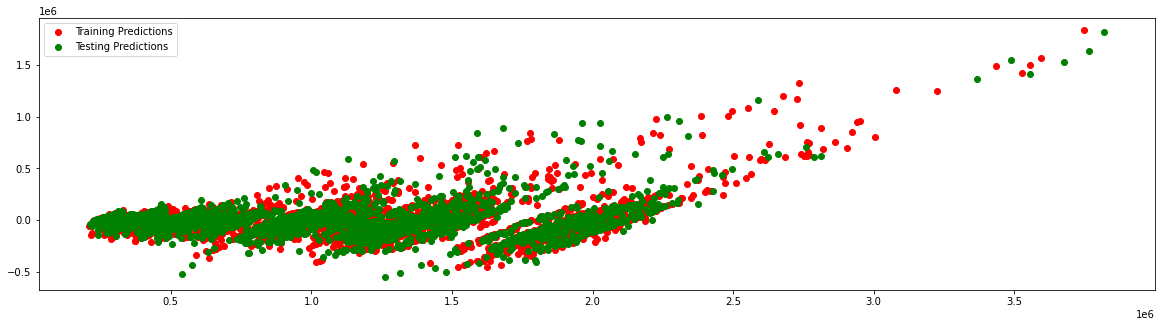

RandomForestRegressor()
For Training Data 
 --------------------------------
MAE:  29213.153888396813
MSE:  3324121896.9933496
r2:  0.989574215238374
RMSE:  57655.19835186893

For Test Data 
 --------------------------------
MAE:  81639.42457727272
MSE:  23435253852.960617
r2:  0.92623613008165
RMSE:  153085.7728626688
Residual Analysis:


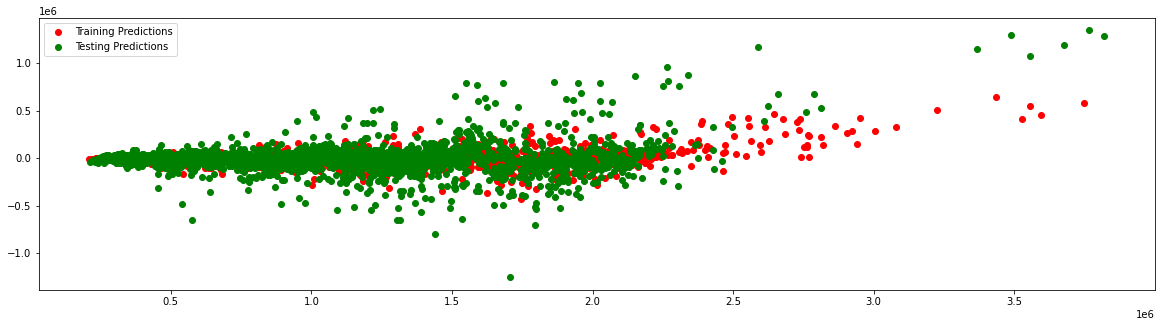

C:\Users\91995\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48600051667461.08, tolerance: 123102816121.14961
  model = cd_fast.enet_coordinate_descent(


Lasso()
For Training Data 
 --------------------------------
MAE:  90687.86399437285
MSE:  25175851047.12882
r2:  0.9210383937949049
RMSE:  158668.99838068185

For Test Data 
 --------------------------------
MAE:  93264.932414794
MSE:  26161370821.451107
r2:  0.9176555130886518
RMSE:  161744.7706154703
Residual Analysis:


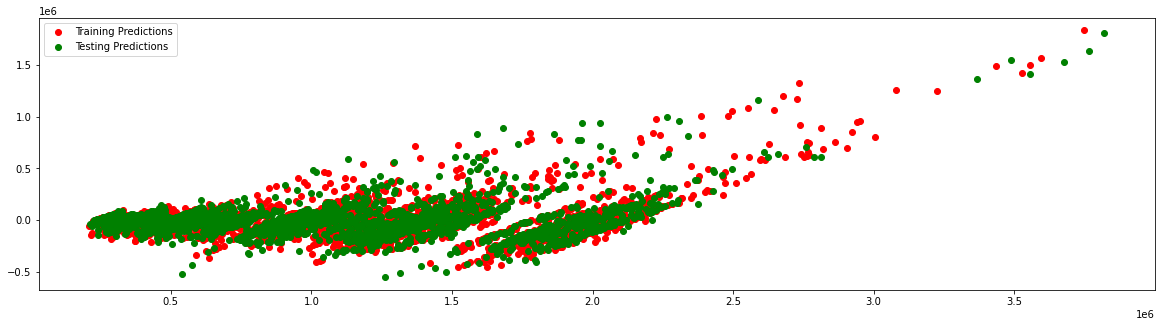

Ridge()
For Training Data 
 --------------------------------
MAE:  90334.99358703296
MSE:  25265959076.83378
r2:  0.920755778730804
RMSE:  158952.69446232668

For Test Data 
 --------------------------------
MAE:  92719.61150062688
MSE:  26142445331.492176
r2:  0.9177150822056851
RMSE:  161686.25585216627
Residual Analysis:


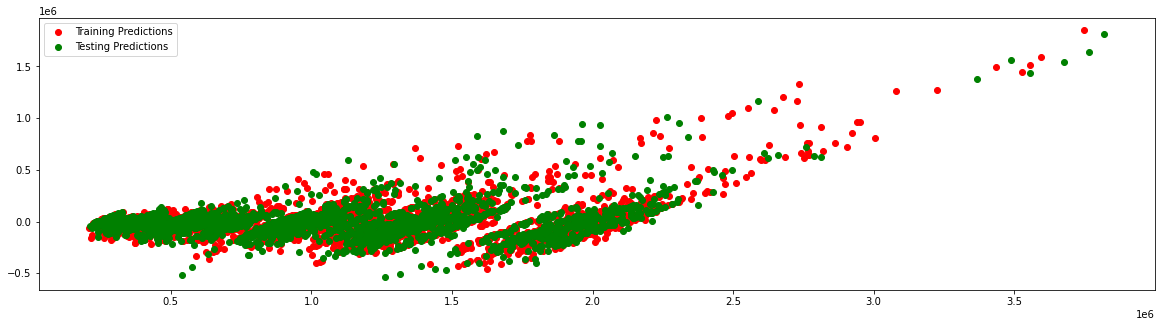

ElasticNet()
For Training Data 
 --------------------------------
MAE:  445299.42085678887
MSE:  287110801690.54724
r2:  0.09950491771345282
RMSE:  535827.212532685

For Test Data 
 --------------------------------
MAE:  450893.17040562455
MSE:  287047372457.0934
r2:  0.09650114416600186
RMSE:  535768.0211221023
Residual Analysis:


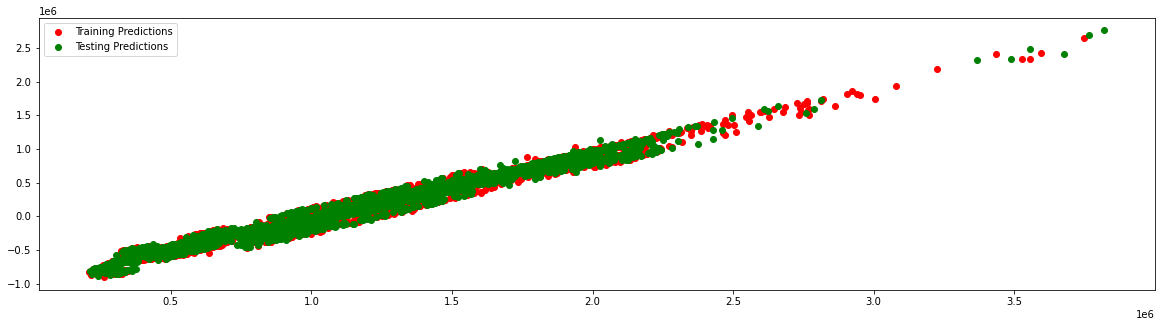

DecisionTreeRegressor()
For Training Data 
 --------------------------------
MAE:  0.0
MSE:  0.0
r2:  1.0
RMSE:  0.0

For Test Data 
 --------------------------------
MAE:  101080.46827894328
MSE:  37147021729.44569
r2:  0.8830775166380888
RMSE:  192735.6265184143
Residual Analysis:


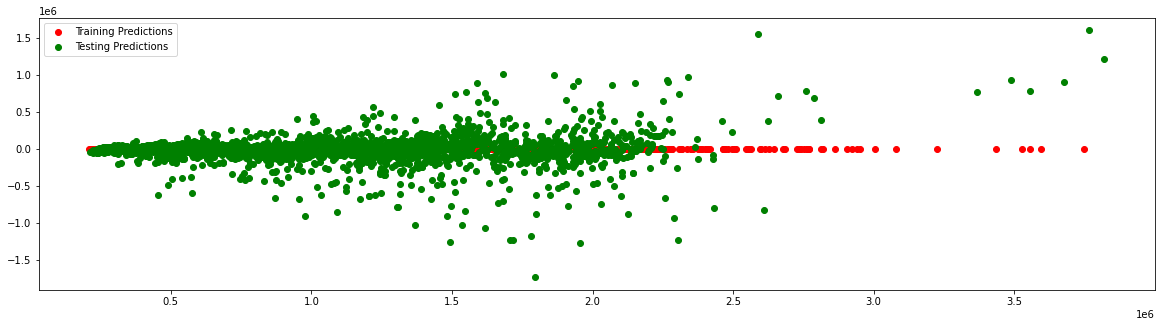

In [48]:
l = (LinearRegression,RandomForestRegressor,Lasso,Ridge,ElasticNet,DecisionTreeRegressor)

for i in l:
    re2 = pred_model2(i, x_train,y_train,x_test,y_test)
    df3 = df3.append(re2, ignore_index = True)

In [49]:
n3 = df3.Model.values
n3[1]='RandomForest()'

In [50]:
cprint('Results for 60:40 Ratio : ', 'green', attrs=['bold'])
df3

Results for 60:40 Ratio : 


,Model,Accuracy for train,MSE for train,MAE for train,Accuracy for test,MSE for test,MAE for test
0,LinearRegression(),92.104070,2.616112e+10,93304.342898,91.765631,2.616112e+10,93304.342898
1,RandomForest(),98.957422,2.343525e+10,81639.424577,92.623613,2.343525e+10,81639.424577
2,Lasso(),92.103839,2.616137e+10,93264.932415,91.765551,2.616137e+10,93264.932415
3,Ridge(),92.075578,2.614245e+10,92719.611501,91.771508,2.614245e+10,92719.611501
4,ElasticNet(),9.950492,2.870474e+11,450893.170406,9.650114,2.870474e+11,450893.170406
5,DecisionTreeRegressor(),100.000000,3.714702e+10,101080.468279,88.307752,3.714702e+10,101080.468279


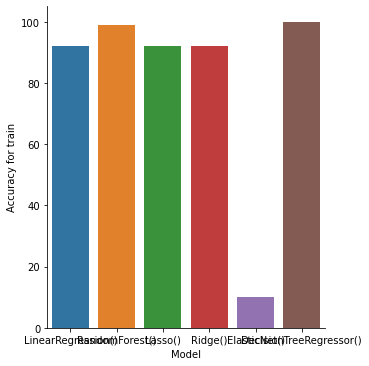

In [51]:
sns.catplot(x= 'Model',y='Accuracy for train',kind='bar',data=df3)

#### After comparing all the models with different test ratios, we get that 'RandomForest' with 70:30 ratio is giving us the best model with 93.145 accuracy.


#### So now we will try to improve it's accuracy further by tuning it's parameters

### Hyperparameter tuning

In [52]:
n_estimators = [5,20,50,100] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [53]:
rf = RandomForestRegressor()

In [54]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

#### Getting the best parameters

In [55]:
print ('Random grid: ', random_grid, '\n')
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}  



#### Using the best parameters obtained in our model and getting the accuracy

In [59]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 120, bootstrap=True) 
randmf.fit( x_train, y_train) 

x_pred = randmf.predict(x_train)
y_pred = randmf.predict(x_test)

For Training Data 
 --------------------------------
MAE:  28123.7028142709
MSE:  3004283881.971731
r2:  0.9905773560396235
RMSE:  54811.34811306625

For Test Data 
 --------------------------------
MAE:  75740.40325905205
MSE:  19934866655.842365
r2:  0.9372538091514873
RMSE:  141190.88729745403
Residual Analysis:


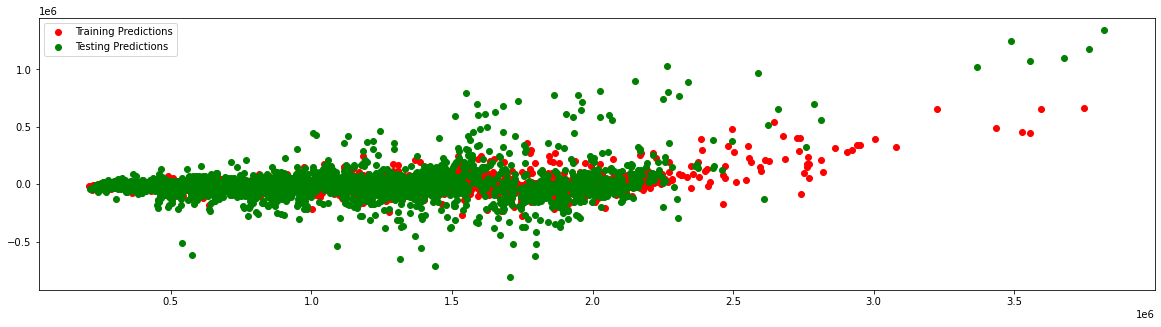

In [60]:
print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_train, x_pred))
print("MSE: ",mean_squared_error(y_train, x_pred))
print("r2: ",r2_score(y_train, x_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_train, x_pred)))

print("")
print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    
print("Residual Analysis:")
plt.figure(figsize = (20,5))
plt.scatter(y_train,(y_train-x_pred),color = "red",label = 'Training Predictions')
plt.scatter(y_test,(y_test-y_pred),color = "green",label = 'Testing Predictions')
plt.legend()
plt.show()

### So, our accuracy has improved slightly after hyperparameter tuning from 93.13 to 93.72

### Hence, we will take this as our final model for further prediction

## Deployment

In [61]:
tempe=input("Temparature : ")
fu = input("Fuel_Price : ")
cp = input("CPI: ")
un = input("Unemployment : ")
print("Is it a holiday :")
holi_0 = int(input("For No-1, Yes-0 : "))
holi_1 = int(input("For No-0, Yes-1 : "))
store=int(input("Enter the store no (1-45): "))
l1=['Store_0','Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 
    'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12',
    'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18',
    'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 
    'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33',
    'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 
    'Store_43', 'Store_44', 'Store_45']

value = l1[store]  

df13 = pd.DataFrame(columns = ['Fuel_Price', 'CPI', 'Unemployment', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0', 'Holiday_Flag_1'])
data = {value:1}
df13 = df13.append(data,ignore_index = True)
df13['Temparature']=tempe
df13['Fuel_Price']=fu
df13['CPI']=cp
df13['Unemployment']=un
df13['Holiday_Flag_0']=holi_0
df13['Holiday_Flag_1']=holi_1

df13 = df13.fillna(0)
df13

Temparature : 42.31
Fuel_Price : 2.572
CPI: 211.096
Unemployment : 8.106
Is it a holiday :
For No-1, Yes-0 : 1
For No-0, Yes-1 : 0
Enter the store no (1-45): 1


,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_0,Holiday_Flag_1,Temparature
0,2.572,211.096,8.106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,42.31


In [62]:
randmf.predict(df13)

array([1087761.6727])

In [63]:
print("So the weekly sales for store 1 on a regular day is  : ",randmf.predict(df13))

So the weekly sales for store 1 on a regular day is  :  [1087761.6727]


## Conclusion

So our dataset was labelled and our problem statement was of prediction, hence we have used different supervised learning algorithms used for prediction.

All the algorithms used in this project are : 
- Linear Regression
- Linear Regression : Lasso
- Linear Regression : Ridge
- Linear Regression : ELasticNet
- Decision Tree
- Random Forest

Also we have used three different train-test ratio for training our model.
And the best model that we obtained was 'RandomForest' with 70:30 ratio and with 93.145 accuracy. 
Also after tuning our model our accuracy further improved from 93.14 to 93.72.

In the end we have created a user-input deployment and predicted the output by the same.

# Reference
 - https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/
 - https://pandas.pydata.org/
 - https://matplotlib.org/
 - https://seaborn.pydata.org/
 - https://plotly.com/
 - https://scikit-learn.org
 - https://www.kaggle.com/datasets/yasserh/walmart-dataset

--------------------------------